#Twitter Sentiment Analysis

**By Neuromatch Academy**

__Content creators:__  Juan Manuel Rodriguez, Salomey Osei, Gonzalo Uribarri

**Our 2021 Sponsors, including Presenting Sponsor Facebook Reality Labs**

<p align='center'><img src='https://github.com/NeuromatchAcademy/widgets/blob/master/sponsors.png?raw=True'/></p>

## Objective:

Objective goes here

# Welcome to the NLP project template

![Xkcd Commit](https://imgs.xkcd.com/comics/machine_learning.png)

# Step 1: Questions and goals

* Can we infer emotion from a tweet text?
* How words are distributed accross the dataset?
* Are words related to one kind of emotion?

# Step 2: Literature review

[Original Dataset Paper](https://cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf)

[Papers with code](https://paperswithcode.com/dataset/imdb-movie-reviews)

# Step 3: Load and explore the dataset

In [ ]:
# We import some libraries to load the dataset
import os
from collections import Counter
from sklearn.utils import shuffle
import numpy as np
import torchtext
from torchtext.data import get_tokenizer
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

You can find the dataset we are going to use in [this website](http://help.sentiment140.com/for-students/).

In [ ]:
!wget http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip

--2021-07-30 15:00:47--  http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip [following]
--2021-07-30 15:00:47--  https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81363704 (78M) [application/zip]
Saving to: ‘trainingandtestdata.zip’

trainingandtestdata 100%[===================>]  77.59M  34.7MB/s    in 2.2s    

2021-07-30 15:00:49 (34.7 MB/s) - ‘trainingandtestdata.zip’ saved [81363704/81363704]



In [ ]:
!unzip trainingandtestdata.zip

Archive:  trainingandtestdata.zip
  inflating: testdata.manual.2009.06.14.csv  
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
# We load the dataset
header_list = ["polarity", "id", "date", "query", "user", "text"]
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1", names = header_list)

# Let's have a look at it
df.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


For this project we will use only the text and the polarity of the tweet. Notice that polarity is 0 for negative tweets and 4 for positive tweet.

In [ ]:
X = df.text.values

# Changes values from [0,4] to [0,1]
y = (df.polarity.values > 1).astype(int)


# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train_text, x_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

The first thing we have to do before working on the models is to familiarize ourselves with the dataset. This is called Exploratory Data Analisys (EDA).

In [ ]:
for s, l in zip(x_train_text[:5], y_train[:5]):
    print('{}: {}'.format(l, s))

1: @paisleypaisley LOL why do i get ideas so far in advance? it's not even june yet! we need a third knitter to have our own summer group 
0: worst headache ever 
0: @ewaniesciuszko  i am so sad i wont see you! I miss you already. and yeah! that's perfect; i come back the 18th!
1: doesn't know how to spell conked 
0: &quot;So we stand here now and no one knows us at all I won't get used to this I won't get used to being gone&quot;...I miss home and everyone  -a


An interesting thing to analyze is the Word Distribution. In order to count the occurrences of each word, we should tokenize the sentences first.

In [ ]:
tokenizer = get_tokenizer("basic_english")

print('Before Tokenize: ',x_train_text[1])
print('After Tokenize: ',tokenizer(x_train_text[1]))

Before Tokenize:  worst headache ever 
After Tokenize:  ['worst', 'headache', 'ever']


In [ ]:
x_train_token = [tokenizer(s) for s in tqdm(x_train_text)]
x_test_token = [tokenizer(s) for s in tqdm(x_test_text)]

We can count the words occurences and see how many different words are present in our dataset.

In [ ]:
words = Counter()
for s in x_train_token:
    for w in s:
        words[w] += 1

sorted_words = list(words.keys())
sorted_words.sort(key=lambda w: words[w], reverse=True)
print('Number of different Tokens in our Dataset: ',len(sorted_words))
print(sorted_words[:100])

Number of different Tokens in our Dataset:  669284
['.', 'i', '!', "'", 'to', 'the', ',', 'a', 'my', 'it', 'and', 'you', '?', 'is', 'for', 'in', 's', 'of', 't', 'on', 'that', 'me', 'so', 'have', 'm', 'but', 'just', 'with', 'be', 'at', 'not', 'was', 'this', 'now', 'can', 'good', 'up', 'day', 'all', 'get', 'out', 'like', 'are', 'no', 'go', 'http', '-', 'today', 'do', 'too', 'your', 'work', 'going', 'love', 'we', 'got', 'what', 'lol', 'time', 'back', 'from', 'u', 'one', 'will', 'know', 'about', 'im', 'really', 'don', 'am', 'had', ')', 'see', 'some', 'there', 'its', '&amp', 'how', 'if', 'still', 'they', '&quot', 'night', '(', 'well', 'want', 'new', 'think', '2', 'home', 'thanks', 'll', 'oh', 'when', 'as', 'he', 'more', 'here', 'much', 'off']


Now we can plot their distribution.

In [ ]:
count_occurences = sum(words.values())

accumulated = 0
counter = 0

while accumulated < count_occurences * 0.8:
    accumulated += words[sorted_words[counter]]
    counter += 1

print('The {}% most common words account for the {}% of the occurrences'.format(counter * 100 / len(words), accumulated * 100 / count_occurences))

The 0.13970153178620734% most common words account for the 80.00532743602652% of the occurrences


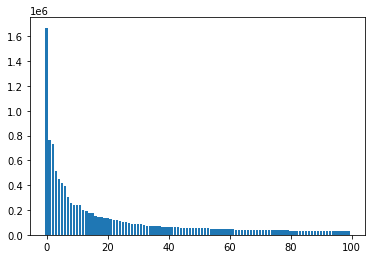

In [ ]:
plt.bar(range(100), [words[w] for w in sorted_words[:100]])
plt.show()

It is very common to find this kind of distribution when analyzing corpus of text. This is referred to as the [zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law).

Usually the number of words in the dictionary will be very large. 

Here are some thing we can do to reduce that number:

* Remove puntuation.
* Remove stop-words.
* Steaming.
* Remove very uncommon words (the words that appears in fewer than N occations).
* Nothing: we can use a pretrain model that handles this kind of situations.


We used one of the simplest tokenizers availables. This tokenizer does not take into account many quirks of the language. Moreover, diferent languages have different quirks, so there is no "universal" tokenizers. There are many libraries that have "better" tokenizers:

* [Spacy](https://spacy.io/): it can be accessed using: `get_tokenizer("spacy")`. Spacy supports a wide range of languages.
* [Huggingface](https://huggingface.co/): it has many tokenizers for different laguages. [Doc](https://huggingface.co/transformers/main_classes/tokenizer.html)
* [NLTK](https://www.nltk.org/): it provides several tokenizers. One of them can be accessed using: `get_tokenizer("toktok")`


# Step 4: choose toolkit

Our goal is to train a model capable of estimating the sentiment of a tweet (positive or negative) by reading its content. To that end we will try 2 different approaches:

* A logistic regression using sklearn. **NOTE**: it can probaly work better than an SVM model.
* A simple Embedding + RNN.

## Logistic regression

We will represent our senteces using binary vectorization. This means that our data would be represented as a matrix of instances by word with a one if the word is in the instance, and zero otherwise. Sklean vectorizers can also do things such as stop-word removal and puntuation removal, you can read more about in [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)
x_train_cv = vectorizer.fit_transform(x_train_text)
x_test_cv = vectorizer.transform(x_test_text)

In [ ]:
print('Before Vectorize: ', x_train_text[3])

Before Vectorize:  doesn't know how to spell conked 


In [ ]:
# Notice that the matriz is sparse
print('After Vectorize: ')
print(x_train_cv[3])

After Vectorize: 
  (0, 528584)	1
  (0, 165468)	1
  (0, 300381)	1
  (0, 242211)	1
  (0, 489893)	1
  (0, 134160)	1


Now we can train our model. You can check the documentation of this logistic regressor [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression).

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='saga')
model.fit(x_train_cv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    160000
           1       0.79      0.81      0.80    160000

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



## Explainable AI
The best thing about logistic regresion is that it is simple, and we can get some explanations.

In [ ]:
print(model.coef_.shape)
print(len(vectorizer.vocabulary_))

words_sk = list(vectorizer.vocabulary_.keys())
words_sk.sort(key=lambda w: model.coef_[0, vectorizer.vocabulary_[w]])

(1, 589260)
589260


In [ ]:
for w in words_sk[:20]:
    print('{}: {}'.format(w, model.coef_[0, vectorizer.vocabulary_[w]]))

roni: -3.8626179619746046
inaperfectworld: -3.5734295065250024
dontyouhate: -3.500216598468438
xbllygbsn: -3.4126433155889138
anqju: -3.3363730101610236
sad: -3.2005179962165635
pakcricket: -3.19488248339233
condolences: -3.132508973378498
heartbreaking: -3.066515560836288
saddest: -3.0420278803166076
sadd: -3.0290554809181103
heartbroken: -3.028790315868981
boohoo: -3.0226127215780463
sadface: -2.991865316397411
rachelle_lefevr: -2.9250627096959674
disappointing: -2.902532737837346
lvbu: -2.89470025274553
saddens: -2.88554171648811
bummed: -2.8365075935093897
neda: -2.7929370469673613


In [ ]:
for w in reversed(words_sk[-20:]):
    print('{}: {}'.format(w, model.coef_[0, vectorizer.vocabulary_[w]]))

iamsoannoyed: 2.8494195965894025
myfax: 2.7975681241065806
jennamadison: 2.566734621815687
yeyy: 2.478051833651402
tryout: 2.4383298059166796
goldymom: 2.4374048590588746
wooohooo: 2.402949358398209
thesupergirl: 2.3565269583108495
iammaxathotspot: 2.311668348828654
londicreations: 2.3074661682422373
smilin: 2.2991638364446856
worries: 2.289951332026246
sinfulsignorita: 2.279901426276397
finchensnail: 2.2643167810817446
smackthis: 2.237671137297168
kv: 2.2158039779880303
tojosan: 2.2118013436822657
russmarshalek: 2.2095573095366827
traciknoppe: 2.176857132997602
congratulations: 2.171588093881636


What does this mean?

Remember the `model.coef_` is the $W$ in:

$$h(x)=\sigma(WX + b)$$

where the label 1 is a positive tweet and the label 0 is a negative tweet.

## Recurrent Neural Network with Pytorch

In the previous section we use a Bag-Of-Words approach to represent each of the tweets. That meas that we only consider how many times each of the words appear in each of the tweets, we didnt take into account the order of the words. But we know that the word order is very important and carries relevant information.

In this section we will solve the same task, but this time we will implement a Recurrent Neural Network (RNN) instead of using a simple Logistic Regression.Unlike feedforward neural networks, RNNs have cyclic connections making them powerful for modeling sequences.

Let's start by importing the relevant libraries.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import TensorDataset, DataLoader

def set_device():
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("WARNING: For this notebook to perform best, "
          "if possible, in the menu under `Runtime` -> "
          "`Change runtime type.`  select `GPU` ")
  else:
    print("GPU is enabled in this notebook.")

  return device

In [ ]:
# Set the device (check if gpu is available)
device = set_device()

GPU is enabled in this notebook.


First we will create a Dictionary (`word_to_idx`). This dictionary will map each Token (usually words) to an index (an integer number). We want to limit our dictionary to a certain number of tokens (`num_words_dict`), so we will include in our ditionary those with more occurrences.

In [ ]:
# From previous section, we have a list with the most used tokens
sorted_words[:10]

['.', 'i', '!', "'", 'to', 'the', ',', 'a', 'my', 'it']

Let's select only the most used.

In [ ]:
num_words_dict = 30000
# We reserve two numbers for special tokens.
most_used_words = sorted_words[:num_words_dict-2]

We will add two extra Tokens to the dictionary, one for words outside the dictionary (`'UNK'`) and one for padding the sequences (`'PAD'`).

In [ ]:
# dictionary to go from words to idx 
word_to_idx = {}
# dictionary to go from idx to words (just in case) 
idx_to_word = {}


# We include the special tokens first
PAD_token = 0   
UNK_token = 1

word_to_idx['PAD'] = PAD_token
word_to_idx['UNK'] = UNK_token

idx_to_word[PAD_token] = 'PAD'
idx_to_word[UNK_token] = 'UNK'

# We popullate our dictionaries with the most used words
for num,word in enumerate(most_used_words):
    word_to_idx[word] = num+2
    idx_to_word[num+2] = word

Our goal now is to transform each tweet from a sequence of tokens to a sequence of indexes. These sequences of indexes will be the input to our pytorch model.

In [ ]:
# A function to convert list of tokens to list of indexes
def tokens_to_idx(sentences_tokens,word_to_idx):
    sentences_idx = []
    for sent in sentences_tokens:
        sent_idx = []
        for word in sent:
            if word in word_to_idx:
                sent_idx.append(word_to_idx[word])
            else:
                sent_idx.append(word_to_idx['UNK'])
        sentences_idx.append(sent_idx)
    return sentences_idx

In [ ]:
x_train_idx = tokens_to_idx(x_train_token,word_to_idx)
x_test_idx = tokens_to_idx(x_test_token,word_to_idx)

In [ ]:
some_number = 1
print('Before converting: ', x_train_token[some_number])
print('After converting: ', x_train_idx[some_number])

Before converting:  ['worst', 'headache', 'ever']
After converting:  [721, 458, 237]


We need all the sequences to have the same length. To select an adequate sequence length, let's explore some statistics about the length of the tweets:

In [ ]:
tweet_lens = np.asarray([len(sentence) for sentence in x_train_idx])
print('Max tweet word length: ',tweet_lens.max())
print('Mean tweet word length: ',np.median(tweet_lens))
print('99% percent under: ',np.quantile(tweet_lens,0.99))

Max tweet word length:  229
Mean tweet word length:  15.0
99% percent under:  37.0


We cut the sequences which are larger than our chosen maximum length (`max_lenght`) and fill with zeros the ones that are shorter.

In [ ]:
 # We choose the max length
 max_length = 40

# A function to make all the sequence have the same lenght
# Note that the output is a Numpy matrix
 def padding(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, tweet in enumerate(sentences):
        len_tweet = len(tweet) 
        if len_tweet != 0:
            if len_tweet <= seq_len:
                # If its shorter, we fill with zeros (the padding Token index)
                features[ii, -len(tweet):] = np.array(tweet)[:seq_len]
            if len_tweet > seq_len:
                # If its larger, we take the last 'seq_len' indexes
                features[ii, :] = np.array(tweet)[-seq_len:]
    return features

In [ ]:
# We convert our list of tokens into a numpy matrix
# where all instances have the same lenght
x_train_pad = padding(x_train_idx,max_length)
x_test_pad = padding(x_test_idx,max_length)

# We convert our target list a numpy matrix
y_train_np = np.asarray(y_train)
y_test_np = np.asarray(y_test)

In [ ]:
some_number = 2
print('Before padding: ', x_train_idx[some_number])
print('After padding: ', x_train_pad[some_number])

Before padding:  [1, 3, 71, 24, 122, 3, 533, 74, 13, 4, 3, 102, 13, 209, 2, 12, 150, 4, 22, 5, 18, 667, 3, 138, 61, 7, 3296, 4]
After padding:  [   0    0    0    0    0    0    0    0    0    0    0    0    1    3
   71   24  122    3  533   74   13    4    3  102   13  209    2   12
  150    4   22    5   18  667    3  138   61    7 3296    4]


Now, let's convert the data to pytorch format.


In [ ]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train_np))
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test_np))

# Batch size (this is an important hyperparameter)
batch_size = 100

# dataloaders
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size,drop_last = True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size,drop_last = True)

Each batch of data in our traning proccess will have the folllowing format:

In [ ]:
# Obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)

Sample input size:  torch.Size([100, 40])
Sample input: 
 tensor([[   0,    0,    0,  ...,    4,    1,    4],
        [   0,    0,    0,  ...,   12, 1575,    2],
        [   0,    0,    0,  ...,   98, 2325,    2],
        ...,
        [   0,    0,    0,  ...,  802, 6321,    2],
        [   0,    0,    0,  ...,  286,   48, 8563],
        [   0,    0,    0,  ...,  101,   14,  597]])
Sample input: 
 tensor([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 0, 1])


Now, we will define the `SentimentRNN` class. Most of the model's class will be familiar to you, but there are two important layers we would like you to pay attention to:

*   Embedding Layer
> This layer is like a linear layer, but it makes it posible to use a sequence of inedexes as inputs (instead of a sequence of one-hot-encoded vectors). During training, the Embedding layer learns a linear transformation from the space of words (a vector space of dimension `num_words_dict`) into the a new, smaller, vector space of dimension `embedding_dim`. We suggest you to read this [thread](https://discuss.pytorch.org/t/how-does-nn-embedding-work/88518/3) and the [pytorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) if you want to learn more about this particular kind of layers.


*   LSTM layer
> This is one of the most used class of Recurrent Neural Networks. In Pytorch we can add several stacked layers in just one line of code. In our case, the number of layers added are decided with the parameter `no_layers`. If you want to learn more about LSTMs we strongly recommend you this [Colahs thread](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) about them.







In [ ]:
class SentimentRNN(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.1):
        super(SentimentRNN,self).__init__()
 
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.no_layers = no_layers
        self.vocab_size = vocab_size
        self.drop_prob = drop_prob
    
        # Embedding Layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        # LSTM Layers
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                            num_layers=no_layers, batch_first=True, 
                            dropout=self.drop_prob)
        
        # Dropout layer
        self.dropout = nn.Dropout(drop_prob)
    
        # Linear and Sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self,x,hidden):
        batch_size = x.size(0)

        # Embedding out
        embeds = self.embedding(x)
        #Shape: [batch_size x max_length x embedding_dim]

        # LSTM out
        lstm_out, hidden = self.lstm(embeds, hidden)
        # Shape: [batch_size x max_length x hidden_dim]

        # Select the activation of the last Hidden Layer
        lstm_out = lstm_out[:,-1,:].contiguous()
        # Shape: [batch_size x hidden_dim]

        ## You can instead average the activations across all the times
        # lstm_out = torch.mean(lstm_out, 1).contiguous()

        # Dropout and Fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)

        # Sigmoid function
        sig_out = self.sig(out)
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
        
        
        
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

We choose the parameters of the model.

In [ ]:
# Parameters of our network

# Size of our vocabulary
vocab_size = num_words_dict

# Embedding dimension
embedding_dim = 32

# Number of stacked LSTM layers
no_layers = 2

# Dimension of the hidden layer in LSTMs
hidden_dim = 64

# Dropout parameter for regularization
output_dim = 1

# Dropout parameter for regularization
drop_prob = 0.25

In [ ]:
# Let's define our model
model = SentimentRNN(no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=drop_prob)

# Moving to gpu
model.to(device)

print(model)

SentimentRNN(
  (embedding): Embedding(30000, 32)
  (lstm): LSTM(32, 64, num_layers=2, batch_first=True, dropout=0.25)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc): Linear(in_features=64, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [ ]:
# How many trainable parameters does our model have?
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print('Total Number of parameters: ',params)

Total Number of parameters:  1018433


We choose the losses and the optimizer for the training procces.

In [ ]:
# loss and optimization functions
lr = 0.001

# Binary crossentropy is a good loss function for a binary classification problem
criterion = nn.BCELoss()

# We choose an Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

We are ready to train our model.

In [ ]:
# Number of training Epochs
epochs = 5

# Maximum absolute value accepted for the gradeint
clip = 5

# Initial Loss value (assumed big)
valid_loss_min = np.Inf

# Lists to follow the evolution of the loss and accuracy
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

# Train for a number of Epochs
for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    
    for inputs, labels in train_loader:

        # Initialize hidden state 
        h = model.init_hidden(batch_size)
        # Creating new variables for the hidden state
        h = tuple([each.data.to(device) for each in h])

        # Move batch inputs and labels to gpu
        inputs, labels = inputs.to(device), labels.to(device)   

        # Set gradient to zero
        model.zero_grad()

        # Compute model output
        output,h = model(inputs,h)
        
        # Calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())

        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy

        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
 
    
    # Evaluate on the validation set for this epoch 
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:

        # Initialize hidden state 
        val_h = model.init_hidden(batch_size)
        val_h = tuple([each.data.to(device) for each in val_h])

        # Move batch inputs and labels to gpu
        inputs, labels = inputs.to(device), labels.to(device)

        # Compute model output
        output, val_h = model(inputs, val_h)

        # Compute Loss
        val_loss = criterion(output.squeeze(), labels.float())

        val_losses.append(val_loss.item())
        
        accuracy = acc(output,labels)
        val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        # torch.save(model.state_dict(), '../working/state_dict.pt')
        valid_loss_min = epoch_val_loss
    print(25*'==')

Epoch 1
train_loss : 0.4358782146242447 val_loss : 0.3883405238064006
train_accuracy : 79.570078125 val_accuracy : 82.434375
Validation loss decreased (inf --> 0.388341).  Saving model ...
Epoch 2
train_loss : 0.37547377434326334 val_loss : 0.3708197010587901
train_accuracy : 83.216171875 val_accuracy : 83.4546875
Validation loss decreased (0.388341 --> 0.370820).  Saving model ...


In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

## What's Next?

You can use this project template as a starting point to think about your own project. There are a lot of ways to continue, here we share with you some ideas you migth find useful:

*   **Work on the Preproccesing.** We used a very rudimentary way to tokenize tweets. But there are better ways to preprocess the data. Can you think of a suitable way to preprocess the data for this particular task? How does the performance of the model change when the data is processed correctly?
*   **Work on the Model.** The RNN model proposed in this notebook is not optimized at all. You can work on finding a better architecture or better hyperparamenters. May be using bidirectonal LSTMs or increasing the number of stacked layers can improve the performance, feel free to try different approaches.
*   **Work on the Embedding.** Our model learnt an embedding during the training on this Twitter corpus for a particular task. You can explore the representation of different words in this learned embedding. Also, you can try using different word embeddings. You can train them on this corpus or you can use an embedding trained on another corpus of data. How does the change of the embedding affect the model performance?
*   **Try sentiment analysis on another dataset.** There are lots of available dataset to work with, we can help you find one that is interesting to you. Do you belive that a sentiment analysis model trained on some corpus (Twitter dataset) will perform well on another type of data (for example, youtube comments)?

